,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


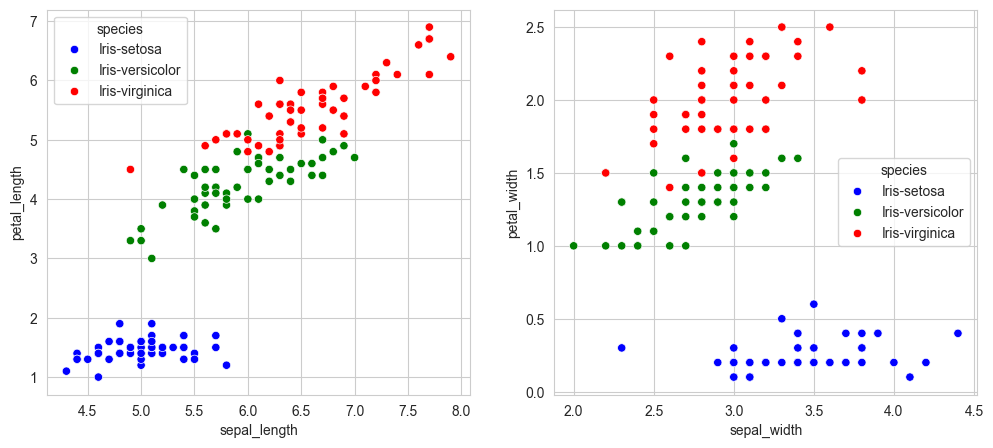

In [19]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iris = pd.read_csv("IRIS.csv")
display(iris.head())

species = iris['species']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=iris['sepal_length'], 
                y=iris['petal_length'], 
                hue=species, 
                palette=['blue', 'green', 'red'], 
                ax=axes[0])

# Second scatter plot on the right
sns.scatterplot(x=iris['sepal_width'],
                y=iris['petal_width'],
                hue=species,
                palette=['blue', 'green', 'red'], 
                ax=axes[1])

# Display the plots
plt.show()


The different species seem to have distinct clusters based on the sepal and petal measurements. The scatter plots show that the setosa species is well separated from the other two species (versicolor and virginica) based on the sepal and petal measurements. The versicolor and virginica species have some overlap in the sepal and petal measurements, but they still form distinct clusters. Their position in the scatter plots indicates that the sepal and petal measurements can be used to differentiate between the three species of iris flowers, but not only that but also that the sepal and petal measurements are correlated with each other, as the clusters are similar in both scatter plots.

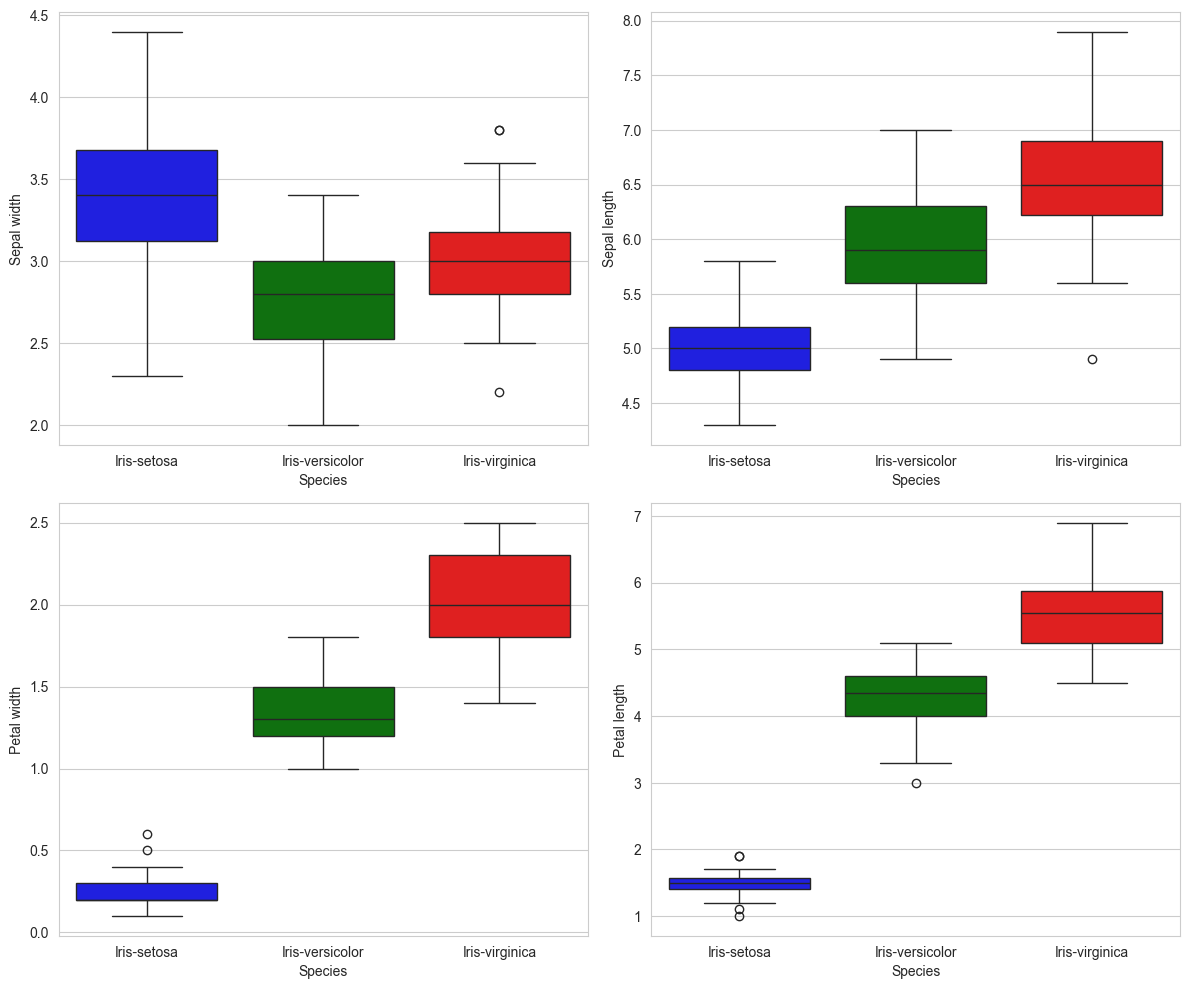

In [20]:
# List of measurements
measurements = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the measurements and corresponding axes to create box plots
palette = ['blue', 'green', 'red']
for ax, measurement in zip(axes, measurements):
    sns.boxplot(x='species', y=measurement, data=iris, ax=ax, hue='species', palette=palette)
    ax.set_xlabel('Species')
    ax.set_ylabel(measurement.capitalize().replace('_', ' '))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Here we can see the distribution of the sepal and petal measurements for each species of iris flowers. The box plots provide a visual representation of the distribution of the measurements, including the median, quartiles, and outliers. The setosa species generally has smaller sepal and petal measurements compared to the versicolor and virginica species. The versicolor and virginica species have similar distributions for sepal width and petal width, but the virginica species tends to have larger sepal length and petal length compared to the versicolor species. The box plots help visualize the differences in the measurements between the three species of iris flowers.

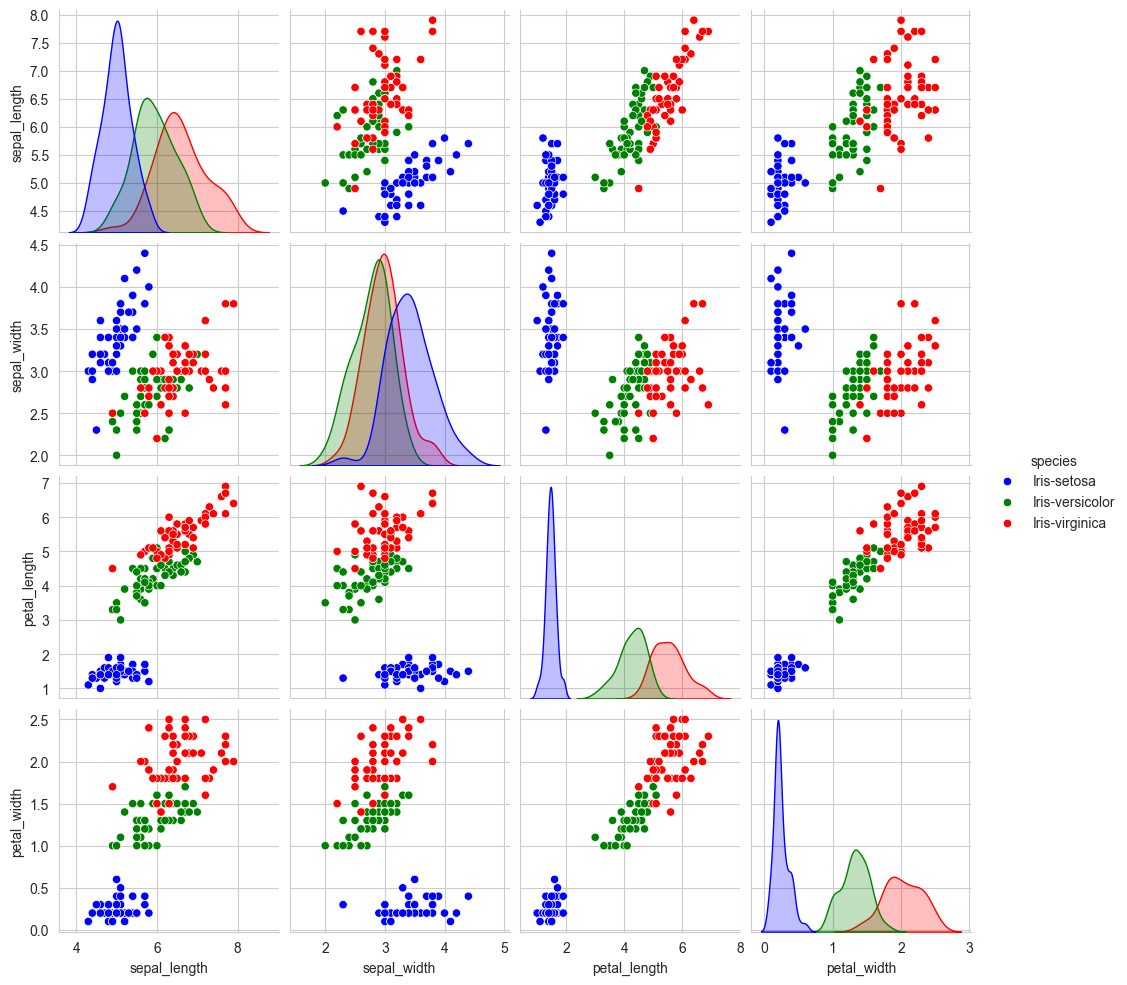

In [21]:
sns.pairplot(iris, hue='species', palette=['blue', 'green', 'red'])
plt.show()

The pairs plot shows the relationships between all pairs of variables in the dataset, colored by species. The diagonal plots show the distribution of each variable, while the scatter plots show the relationships between different pairs of variables. The plots provide insights into the relationships between the sepal and petal measurements for each species of iris flowers. For example, the scatter plots show that some of  the sepal and petal measurements are correlated, and the setosa species is well separated from the other two species based on the sepal and petal measurements. The pairs plot is a useful visualization to explore the relationships between multiple variables in the dataset.


Top 3 most prevalent species:
['Grönsiska', 'Sothöna', 'Gräsand']


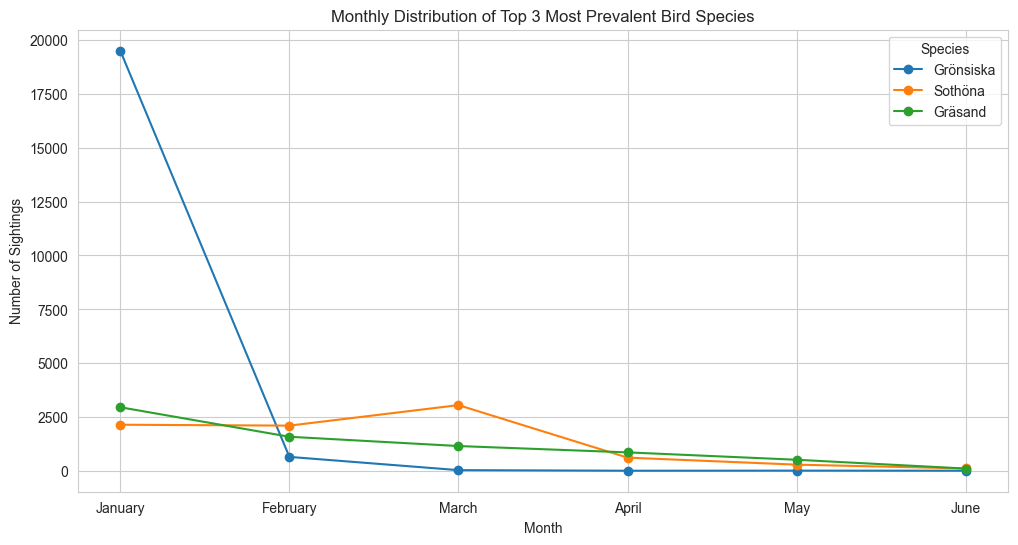


The rarest species with their counts:


,Artnamn,Sightings
0,Bändelkorsnäbb,1.0
1,Bivråk,1.0
2,Forsärla,1.0
3,Gravand,1.0
4,Ejder,1.0
5,Fjällvråk,1.0
6,"Ormvråk, underarten buteo",1.0
7,Lappsparv,1.0
8,Rosenfink,1.0
9,Röd glada,1.0


In [22]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
birds = pd.read_csv("artportalen.csv")

# Convert 'Antal' to numeric and drop NaNs
birds['Antal'] = pd.to_numeric(birds['Antal'], errors='coerce')
birds_filtered = birds[['Artnamn', 'Antal']].dropna()

# Save the filtered data to a CSV file
birds_filtered.to_csv("birds_filtered.csv", index=False)

#display(birds_filtered)

# Calculate total sightings for each species
species_counts = birds_filtered.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)

# Most prevalent species
most_prevalent_species = species_counts.idxmax()

# Top 3 most prevalent species
top_3_species = species_counts.head(3).index.tolist()

# Print the most prevalent species
#print("The most prevalent species is:", most_prevalent_species)
# Print the top 3 most prevalent species
print("\nTop 3 most prevalent species:")
print(top_3_species)

# Filter the data to only include the top 3 species
birds_top_3 = birds[birds['Artnamn'].isin(top_3_species)].copy()

birds_top_3['Startdatum'] = pd.to_datetime(birds_top_3['Startdatum'])
birds_top_3['Månad'] = birds_top_3['Startdatum'].dt.month

# Get monthly distribution of top 3 species
monthly_distribution = birds_top_3.groupby(['Artnamn', 'Månad'])['Antal'].sum().reset_index(name='Sightings')

# Set the style
sns.set_style('whitegrid')

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each species separately
for species in top_3_species:
    species_data = monthly_distribution[monthly_distribution['Artnamn'] == species]
    plt.plot(species_data['Månad'], species_data['Sightings'], marker='o', label=species)

# Customize the plot
plt.title('Monthly Distribution of Top 3 Most Prevalent Bird Species')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')

# Define the ticks and labels
months = birds_top_3['Månad'].sort_values().unique()
month_names = ['January', 'February', 'March', 'April', 'May', 'June']

# Map the month numbers to month names
plt.xticks(ticks=months, labels=[month_names[m-1] for m in months])

plt.legend(title='Species')
plt.show()

# Get list of rarest species with their sighting counts
min_sightings = species_counts.min()
rarest_species = species_counts[species_counts == min_sightings]

# Display the rarest species as a table with their counts
print("\nThe rarest species with their counts:")
display(rarest_species.reset_index(name='Sightings'))

# Question 1 - What month has the most bird sightings?

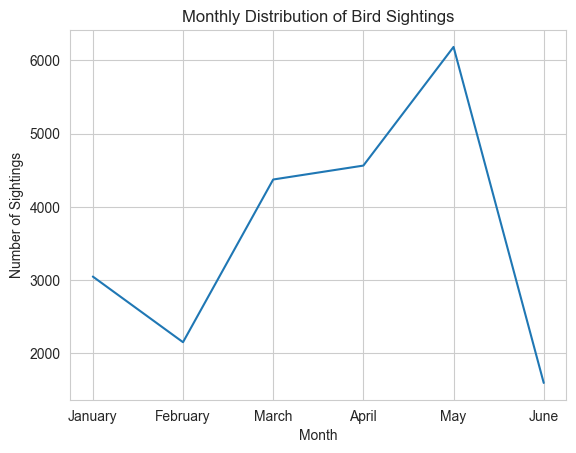

In [23]:
# Ensure the month does not go beyond June
#Question 1 - What month has the most bird sightings?

birds['Startdatum'] = pd.to_datetime(birds['Startdatum'])
birds['Månad'] = birds['Startdatum'].dt.month

# Filter data to include only months from January to June
birds = birds[birds['Månad'] <= 6]

monthly_distribution_total = birds.groupby('Månad').size().reset_index(name='Sightings')
sns.lineplot(x='Månad', y='Sightings', data=monthly_distribution_total)
plt.title('Monthly Distribution of Bird Sightings')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')

# Define the months explicitly from January to June
months = list(range(1, 7))
month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.xticks(ticks=months, labels=month_names)
plt.show()

From the graph above, we can see that the month with the most bird sightings is May. This is based on the data from January to June, where May had the highest number of bird sightings. The number of sightings increases from January to May and then decreases in June, probably due to the end of the bird-watching season or other factors such as migration patterns.

# Question 2 - Who are the top 3 observers and what species have they observed the most?

In [24]:
# Count the number of unique observers
unique_observers_count = birds['Observatörer'].nunique()
print(f"Total number of unique observers: {unique_observers_count}")

# Group by 'Observatörer' and sum the 'Antal' column to get the total observations for each observer
observer_counts = birds.groupby('Observatörer')['Antal'].sum()

# Get top 3 observers
top_3_observers = observer_counts.nlargest(3).index.tolist()

# Calculate total observations and top 3 observations
total_observations = observer_counts.sum()
top_3_observations = observer_counts[top_3_observers].sum()

print(f"Total number of observations: {total_observations}")
print(f"Observations accounted for by top 3 observers: {top_3_observations}")

for observer in top_3_observers:
    # Filter records for the observer
    observer_data = birds[birds['Observatörer'] == observer]
    
    # Group by 'Artnamn' and sum the 'Antal' column to get the number of observations per species
    species_counts = observer_data.groupby('Artnamn')['Antal'].sum()
    
    # Get the top 5 species
    top_5_species = species_counts.nlargest(5)
    
    # Get the total observations for the observer
    total_observations_per_observer = species_counts.sum()
    
    # Display the results
    print(f"\nTop 5 bird species observed by {observer}:")
    print(top_5_species)
    print(f"Total observations by {observer}: {total_observations_per_observer}")

Total number of unique observers: 435
Total number of observations: 115787.0
Observations accounted for by top 3 observers: 52000.0

Top 5 bird species observed by Svante Söderholm:
Artnamn
Grönsiska        14622.0
Gräsand           2306.0
Storskrake        2290.0
Storskarv         1997.0
Vitkindad gås     1356.0
Name: Antal, dtype: float64
Total observations by Svante Söderholm: 43005.0

Top 5 bird species observed by Virginia Kustvall Larsson, Folke K Larsson:
Artnamn
Sothöna          899.0
Storskrake       688.0
Grönsiska        496.0
Vitkindad gås    305.0
Gråhäger         239.0
Name: Antal, dtype: float64
Total observations by Virginia Kustvall Larsson, Folke K Larsson: 4719.0

Top 5 bird species observed by Johan Nilsson:
Artnamn
Koltrast    470.0
Rödhake     306.0
Talgoxe     243.0
Gärdsmyg    219.0
Skata       177.0
Name: Antal, dtype: float64
Total observations by Johan Nilsson: 4276.0


There are a total of 435 unique observers in the dataset. The top 3 observers with the most observations are Svante Söderholm with 43005 observations, close to half of the total observations, followed by Virginia Kustvall Larsson, Folke K Larsson with 4719 observations and Johan Nilsson with 4276 observations. Out of 435 unique observers, the top 3 observers account for 52000 observations, which is approximately 45% of the total observations.

# Question 3 - How does the number of observations change based on the northern coordinate?

C:\Users\AlbinC\AppData\Local\Temp\ipykernel_20968\2470440589.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  north_bin_counts = birds.groupby('NorthBin')['Antal'].sum().reset_index()


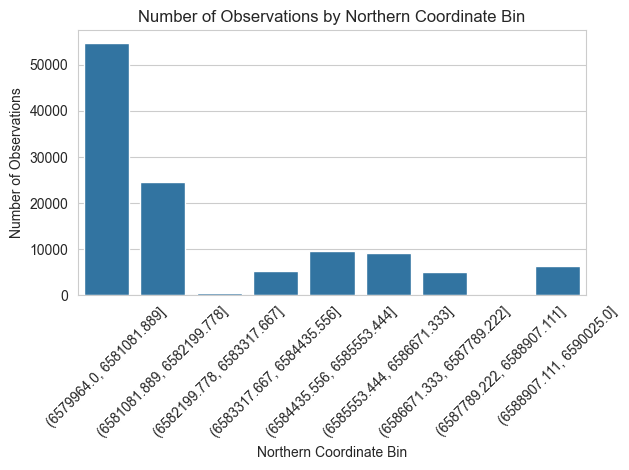

In [25]:
# Define bins for the northern coordinates
north_bins = np.linspace(birds['Nordkoordinat'].min(), birds['Nordkoordinat'].max(), 10)
birds['NorthBin'] = pd.cut(birds['Nordkoordinat'], bins=north_bins)

# Sum observations for each northern coordinate bin
north_bin_counts = birds.groupby('NorthBin')['Antal'].sum().reset_index()

# Plot the number of observations for each northern coordinate bin
sns.barplot(x='NorthBin', y='Antal', data=north_bin_counts)
plt.xticks(rotation=45)
plt.title('Number of Observations by Northern Coordinate Bin')
plt.xlabel('Northern Coordinate Bin')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

Without further research on why the graph looks like it does, it's difficult to pinpoint an exact reason. However, the graph shows a clear trend of decreasing bird observations as we move from lower to higher northern coordinates. This could be due to various factors such as climate, habitat, or the distribution of bird species across different regions. It would be interesting to explore the underlying reasons for this trend further to gain more insights into the bird observation patterns. Also, the data might be skewed due to more people observing birds in certain regions compared to others, leading to variations in the number of observations.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,gender,stroke
0,Female,141
1,Male,108


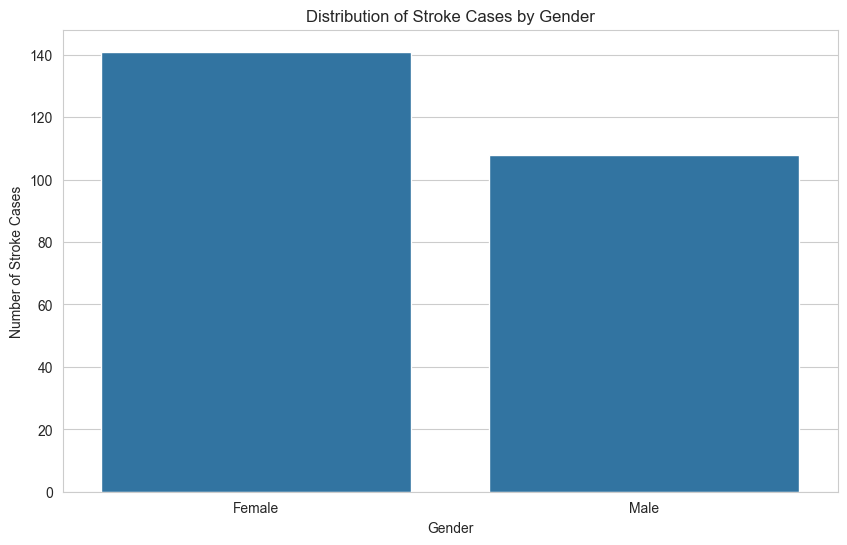

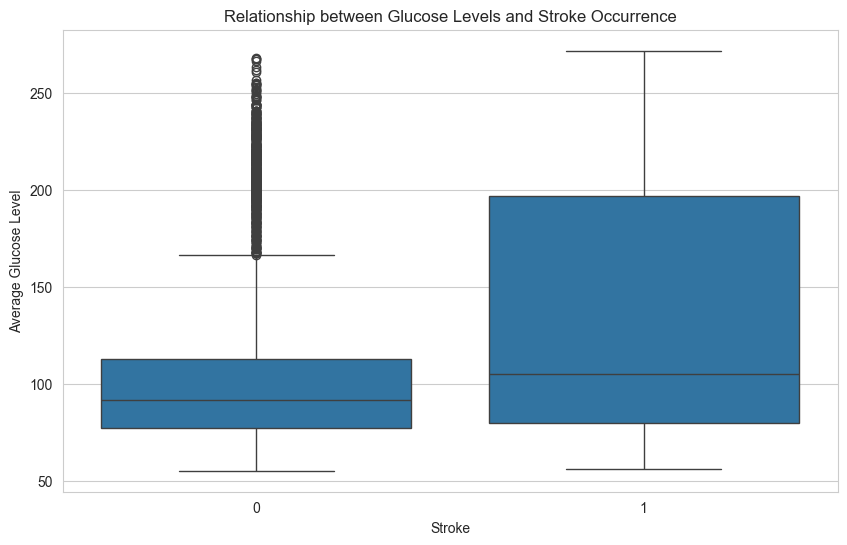

,age_group,stroke
0,0-18,2
1,19-30,0
2,31-40,6
3,41-50,12
4,51-60,48
5,61-70,47
6,71-80,94
7,81-100,40


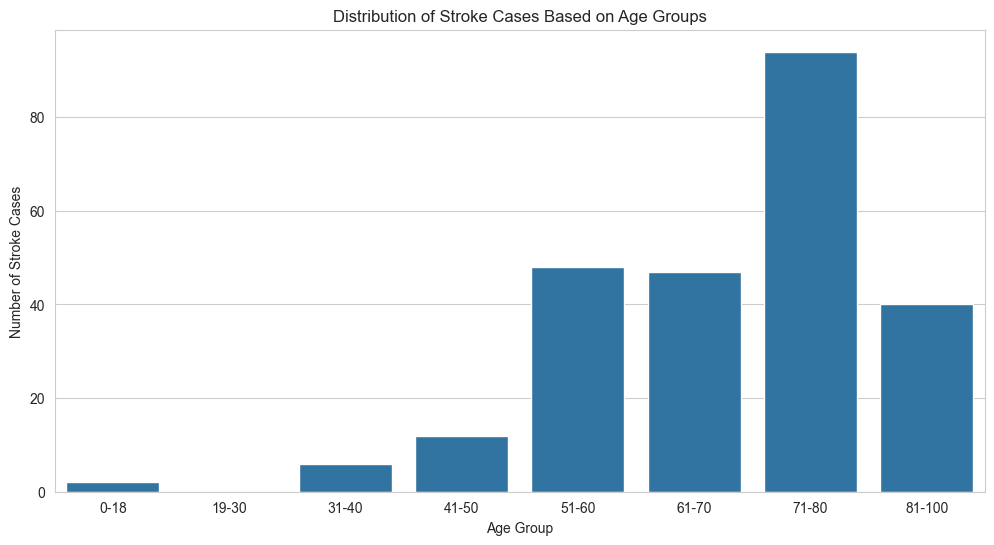

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
stroke_data = pd.read_csv("stroke-data.csv")
display(stroke_data.head())

# Filter out 'other' gender
stroke_data_filtered = stroke_data[stroke_data['gender'] != 'Other'].copy()

# Question 1: Distribution of stroke cases by gender
gender_distribution = stroke_data_filtered.groupby('gender')['stroke'].sum().reset_index()
display(gender_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_distribution['gender'], y=gender_distribution['stroke'])
plt.title('Distribution of Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')
plt.show()

# Question 2: Relationship between glucose levels and stroke occurrence
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_data_filtered)
plt.title('Relationship between Glucose Levels and Stroke Occurrence')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

# Question 3: Distribution of stroke cases based on age with age bins
# Define age bins
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']

# Use .loc to set the new column
stroke_data_filtered.loc[:, 'age_group'] = pd.cut(stroke_data_filtered['age'], bins=bins, labels=labels, right=False)

# Group by age bins and sum the stroke cases - setting observed=False explicitly
age_group_distribution = stroke_data_filtered.groupby('age_group', observed=False)['stroke'].sum().reset_index()
display(age_group_distribution)

# Plot the distribution of stroke cases based on age groups
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_distribution['age_group'], y=age_group_distribution['stroke'])
plt.title('Distribution of Stroke Cases Based on Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Stroke Cases')
plt.show()

# General thougths about the dataset:
    - The dataset is easy to navigate, and most of the missing data is in the 'bmi' column, if maybe only in that one. The data is well-structured and provides relevant information for analyzing stroke occurrences. If one were to analyze the data further, a linear regression model could be used to predict the likelihood of a stroke based on various factors such as age, bmi, hypertension, etc. Also to check the correlation between the variables, considering age is probably a driving factor in stroke occurrences.


# Question 1
    - The bar plot indicates the distribution of stroke cases between genders. There is a notable differnce in the number of stroke cases between men and women. However, it is important to consider that women have a longer life expectancy and may have a higher risk of getting strokes due to this factor.

# Question 2
    - The boxplot visualizes the relationship between glucose levels and stroke occurrence. The boxplot shows that the average glucose level for stroke cases is slightly higher than for non-stroke cases. This could indicate that higher glucose levels might be associated with an increased risk of stroke. However, it is essential to consider other factors such as age, hypertension, and other health conditions that could contribute to the risk of stroke. As well as the fact that as we tend to get older, our average glucose levels tend to increase, meaning that age could be the reason for why the data looks like it does.

# Question 3
    - The bar plot shows the distribution of stroke cases based on age groups. The highest number of stroke cases is observed in the age group 71-80, which is consistent with the general trend of strokes being more prevalent in older age groups. It does make sense that the older you get, the more likely you are to have a stroke, but it would be interesting to see the distribution of other factors such as hypertension, heart disease, etc., within these age groups to understand the underlying causes of strokes better. Also the reason why the '81-100' age bucket has fewer stroke cases than the '71-80' age bucket is due to a smaller sample size.


In [35]:
import pandas as pd
import numpy as np

# Load the dataset
cell_phones = pd.read_csv("cell_phones_total.csv")
display(cell_phones.head())

# Checking for missing values
missing_values = cell_phones.isnull().sum()

# Extracting the year columns
year_columns = cell_phones.columns[1:]  # The first column is 'iso-3'

# Function to convert to scientific notation
def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip()  # Remove leading/trailing whitespaces
        if 'k' in x:
            number = float(x.replace('k', '')) * 1e3
        elif 'M' in x:
            number = float(x.replace('M', '')) * 1e6
        elif 'B' in x:
            number = float(x.replace('B', '')) * 1e9
        elif x == '':
            return np.nan
        else:
            try:
                number = float(x)
            except ValueError:
                return np.nan
    else:
        number = x

    return number if pd.notnull(number) else number

# Apply conversion to number for all year columns
for col in year_columns:
    cell_phones[col] = cell_phones[col].apply(convert_to_number)

# Function to fill missing values based on previous two years' values
def fill_missing_values(row, year_cols):
    for i in range(2, len(year_cols)):  # Adjust loop to include the last column
        if pd.isna(row[year_cols[i]]): # Check if the value is missing
            prev_value1 = row[year_cols[i - 1]] # Get the previous year's value
            prev_value2 = row[year_cols[i - 2]] # Get the value from two years ago
            if pd.notna(prev_value1) and pd.notna(prev_value2): # Check if both values are not missing
                diff = prev_value1 - prev_value2 # Calculate the difference
                row[year_cols[i]] = prev_value1 + diff # Fill in the missing value
    return row # Return the updated row

# Apply the function to fill missing values
cell_phones = cell_phones.apply(lambda row: fill_missing_values(row, year_columns), axis=1)

filtered_columns = ['iso-3','2015', '2016', '2017', '2018', '2019']
filtered_df = cell_phones[filtered_columns].copy()  # creates a copy to avoid warnings

# Find the top 5 countries with the most cellphones in 2015
top_5_countries = filtered_df.nlargest(5, '2015')

pd.options.display.float_format = '{:.3g}'.format

display(top_5_countries)

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k


,iso-3,1985,1995,2011,2015,2016,2017,2018,2019
35,CHN,0,3.63e+06,9.86e+08,1.29e+09,1.36e+09,1.47e+09,1.65e+09,1.73e+09
87,IND,0,7.67e+04,8.94e+08,1e+09,1.13e+09,1.17e+09,1.18e+09,1.15e+09
200,USA,3.4e+05,3.38e+07,2.97e+08,3.82e+08,3.96e+08,4e+08,4.22e+08,4.44e+08
86,IDN,2.03e+03,2.11e+05,2.5e+08,3.39e+08,3.86e+08,4.35e+08,3.19e+08,3.45e+08
26,BRA,0,1.29e+06,2.34e+08,2.58e+08,2.44e+08,2.18e+08,2.07e+08,1.96e+08


To clean up the data and convert the values to numbers, I created a function that converts the values to numbers while keeping zeros the same, but I didn't quite get it do work as I wanted and with some time pressure I asked Chat-GPT to see what the issue could be. And it should now work correctly, or as the instructions wanted it to look like. The function checks for 'k', 'M', and 'B' in the values and converts them to the corresponding numbers (thousands, millions,billions). The function fill_missing_values fills in the missing values based on the previous two years' values, taking the difference and subtracting/adding depending on the change was negative/positive. I think it is a fairly elegant solution to solve the problem if we are taking the route to treat all missing values, altough simple it follows context and probably doesnt skew the data too much 